In [216]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans

In [217]:
#Printing the versions of libraries
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(sklearn.__version__)

1.0.5
1.18.1
0.10.1
0.23.1


In [171]:
#Reading the csv file
data = pd.read_csv(r"C:\Users\Avinash\Desktop\customer-segmentation-dataset\Mall_Customers.csv")

In [172]:
#First 10 rows of the data
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [209]:
#Last 10 rows of data
data.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
190,191,Female,34,103,23,0
191,192,Female,32,103,69,3
192,193,Male,33,113,8,0
193,194,Female,38,113,91,3
194,195,Female,47,120,16,0
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0
199,200,Male,30,137,83,3


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [174]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [175]:
#Columns present in the dataset
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Female    112
Male       88
Name: Gender, dtype: int64


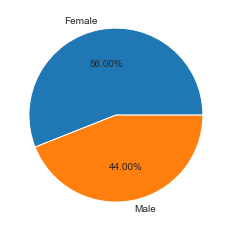

In [176]:
#Pie chart for gender distribution
gender = data["Gender"].value_counts()
print(gender)
gen = []
gen_count = []
for key,value in gender.items():
    gen.append(key)
    gen_count.append(value)
#print(gen_count)
plt.pie(gen_count, labels = gen,autopct='%1.2f%%')
plt.show()

Female    112
Male       88
Name: Gender, dtype: int64


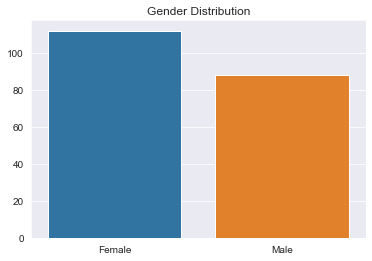

In [177]:
#Bar plot of gender
gender = data["Gender"].value_counts()
print(gender)
sns.set_style("darkgrid")
plt.title("Gender Distribution")
sns.barplot(x = gender.index, y = gender.values)
plt.show()


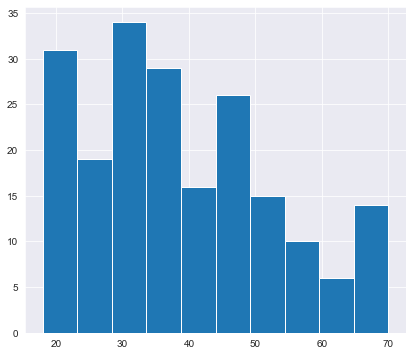

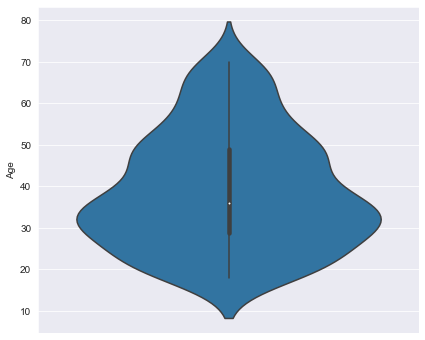

In [178]:
# Histogram of Age frequency
plt.figure(figsize = (15,6))
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Age frequency")
plt.subplot(1,2,1)
ages = data["Age"].hist()
plt.show()

#Violin Plot of Age Frequency
plt.figure(figsize = (15,6))
plt.title("Age Frequency")
sns.axes_style("dark")
plt.subplot(1,2,2)
sns.violinplot(y = data["Age"])
plt.show()

Money spent by male:  4269.0
Money spent by female:  5771.0


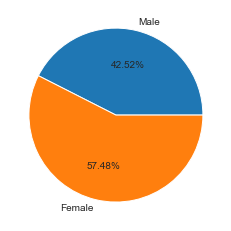

In [179]:
#Pie chart showing total money spent by male and female 
total_spending = []
male_spending = data["Spending Score (1-100)"].where(data["Gender"]=="Male").sum()
print("Money spent by male: ",male_spending)
total_spending.append(male_spending)
female_spending = data["Spending Score (1-100)"].where(data["Gender"]=="Female").sum()
print("Money spent by female: ",female_spending)
total_spending.append(female_spending)
gender_list = ["Male","Female"]
plt.pie(total_spending, labels = gender_list,autopct='%1.2f%%')
plt.show()

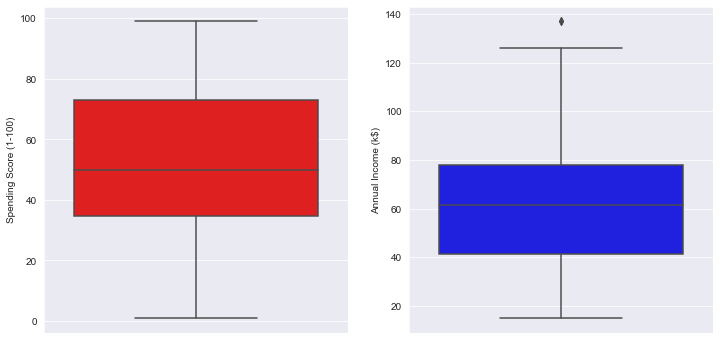

In [180]:
#Box plot of Spending score and Annual Income
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.boxplot(y = data["Spending Score (1-100)"],color = "red")
plt.subplot(1,2,2)
sns.boxplot(y = data["Annual Income (k$)"],color = "blue")
plt.show()

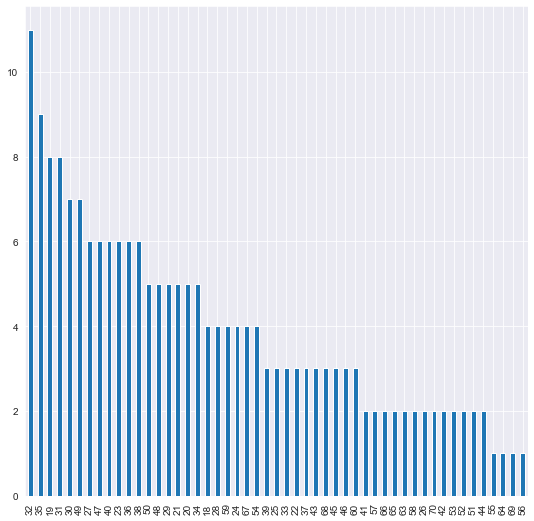

In [181]:
data['Age'].value_counts().plot.bar(figsize = (9, 9))

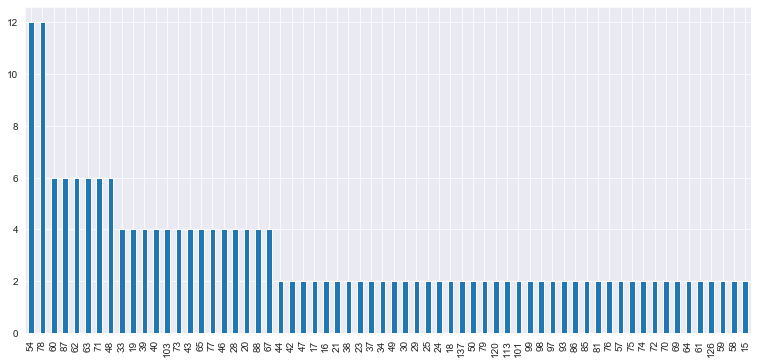

In [182]:
data['Annual Income (k$)'].value_counts().plot.bar(figsize = (13, 6))

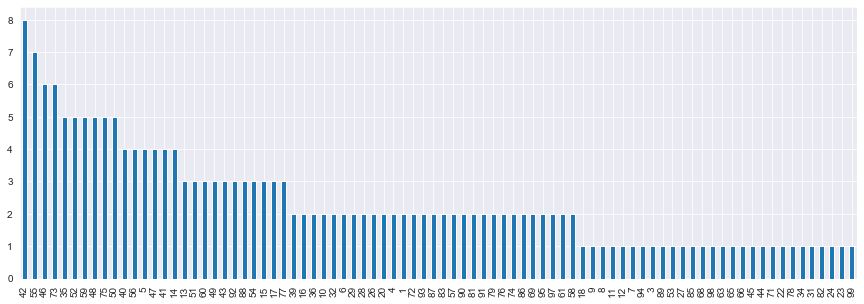

In [183]:
data['Spending Score (1-100)'].value_counts().plot.bar(figsize = (15, 5))

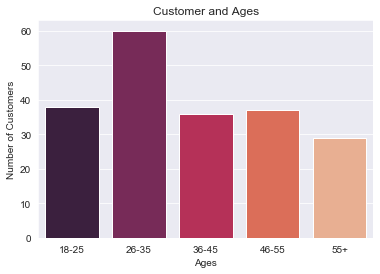

In [184]:
#Different Age groups
age18_25 = data.Age[(data.Age<=25) & (data.Age>=18)]
age26_35 = data.Age[(data.Age<=35) & (data.Age>=26)]
age36_45 = data.Age[(data.Age<=45) & (data.Age>=36)]
age46_55 = data.Age[(data.Age<=55) & (data.Age>=46)]
age_above55 = data.Age[data.Age>=56]

age_group = ["18-25","26-35","36-45","46-55","55+"]
number_of_people = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age_above55.values)]
sns.barplot(x = age_group, y = number_of_people,palette = "rocket")
plt.title("Customer and Ages")
plt.ylabel("Number of Customers")
plt.xlabel("Ages")
plt.show()

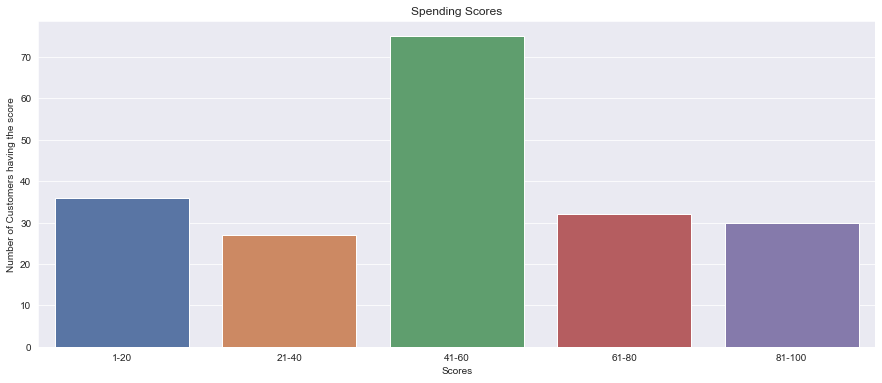

In [185]:
#Grouping spending scores
sscore1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"]>=1) & (data["Spending Score (1-100)"]<=20) ]
sscore21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"]>=21) & (data["Spending Score (1-100)"]<=40) ]
sscore41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"]>=41) & (data["Spending Score (1-100)"]<=60) ]
sscore61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"]>=61) & (data["Spending Score (1-100)"]<=80) ]
sscore81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"]>=81) & (data["Spending Score (1-100)"]<=100) ]
s_scorex = ["1-20","21-40","41-60","61-80","81-100"]
s_scorey = [len(sscore1_20.values),len(sscore21_40.values),len(sscore41_60.values),len(sscore61_80.values),len(sscore81_100.values)]

#Bar plot of spending score
plt.figure(figsize = (15,6))
sns.barplot(x = s_scorex, y = s_scorey,palette = "deep")
plt.title("Spending Scores")
plt.ylabel("Number of Customers having the score")
plt.xlabel("Scores")
plt.show()

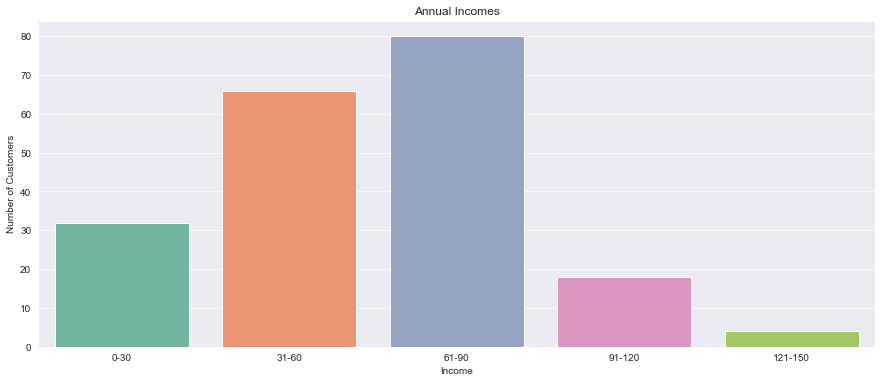

In [186]:
#Grouping Annual Incomes
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"]>=0) & (data["Annual Income (k$)"]<=30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"]>=31) & (data["Annual Income (k$)"]<=60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"]>=61) & (data["Annual Income (k$)"]<=90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"]>=91) & (data["Annual Income (k$)"]<=120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"]>=121) & (data["Annual Income (k$)"]<=150)]

aix = ["0-30","31-60","61-90","91-120","121-150"]
aiy = [len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]

#Bar plot of Annual Incomes
plt.figure(figsize = (15,6))
sns.barplot(x = aix, y = aiy,palette = "Set2")
plt.title("Annual Incomes")
plt.ylabel("Number of Customers")
plt.xlabel("Income")
plt.show()

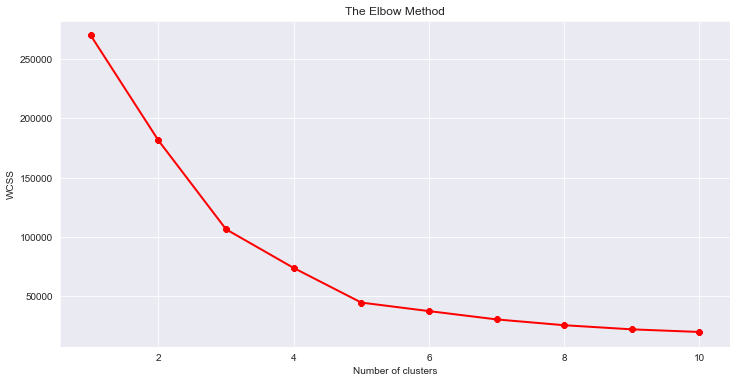

In [187]:
#Finding optimal number of clusters using elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data.iloc[:,[3,4]].values)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.plot(range(1, 11), wcss,color = "red",marker = "8",linewidth = "2")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [221]:
#Finding optimal number of clusters using Average Silhouette Method
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(data.iloc[:,[3,4]].values)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data.iloc[:,[3,4]].values, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.2968969162503008)
For n_clusters = 3, silhouette score is 0.46761358158775435)
For n_clusters = 4, silhouette score is 0.4931963109249047)
For n_clusters = 5, silhouette score is 0.553931997444648)
For n_clusters = 6, silhouette score is 0.53976103063432)
For n_clusters = 7, silhouette score is 0.5270287298101395)
For n_clusters = 8, silhouette score is 0.45492755850983463)
For n_clusters = 9, silhouette score is 0.4607224274992025)


In [188]:
#Fitting k-means to the dataset
kmean = KMeans(n_clusters = 5)
clusters = kmean.fit_predict(data.iloc[:,[3,4]].values)
data["label"] = clusters

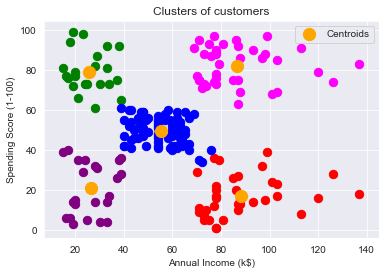

In [206]:
# Visualising the clusters
plt.scatter(data.iloc[:,[3,4]].values[clusters == 0, 0], data.iloc[:,[3,4]].values[clusters == 0, 1], s = 70, c = 'red')
plt.scatter(data.iloc[:,[3,4]].values[clusters == 1, 0], data.iloc[:,[3,4]].values[clusters == 1, 1], s = 70, c = 'green')
plt.scatter(data.iloc[:,[3,4]].values[clusters == 2, 0], data.iloc[:,[3,4]].values[clusters == 2, 1], s = 70, c = 'blue')
plt.scatter(data.iloc[:,[3,4]].values[clusters == 3, 0], data.iloc[:,[3,4]].values[clusters == 3, 1], s = 70, c = 'magenta')
plt.scatter(data.iloc[:,[3,4]].values[clusters == 4, 0], data.iloc[:,[3,4]].values[clusters == 4, 1], s = 70, c = 'purple')
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 150, c = 'orange', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

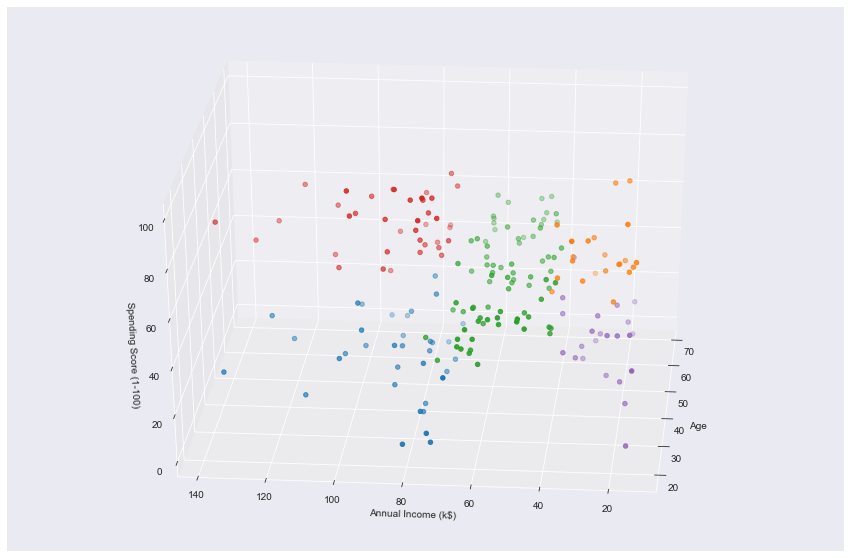

In [215]:
# 3D Visualization
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label==0], data["Annual Income (k$)"][data.label==0],data["Spending Score (1-100)"][data.label==0])
ax.scatter(data.Age[data.label==1], data["Annual Income (k$)"][data.label==1],data["Spending Score (1-100)"][data.label==1])
ax.scatter(data.Age[data.label==2], data["Annual Income (k$)"][data.label==2],data["Spending Score (1-100)"][data.label==2])
ax.scatter(data.Age[data.label==3], data["Annual Income (k$)"][data.label==3],data["Spending Score (1-100)"][data.label==3])
ax.scatter(data.Age[data.label==4], data["Annual Income (k$)"][data.label==4],data["Spending Score (1-100)"][data.label==4])
ax.view_init(30,185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()